In [2]:
import pandas as pd

# full path to the dataset
file_path = r"C:\Users\Vidhi\OneDrive\Desktop\cyber_bullying\cyberbullying_tweets.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [3]:
# Check the dataset's dimensions (rows and columns)
print(data.shape)

# Check the column names
print(data.columns)

# Check for missing values
print(data.isnull().sum())

# Check unique categories in 'cyberbullying_type'
print(data['cyberbullying_type'].unique())

# Check value counts for each category
print(data['cyberbullying_type'].value_counts())


(47692, 2)
Index(['tweet_text', 'cyberbullying_type'], dtype='object')
tweet_text            0
cyberbullying_type    0
dtype: int64
['not_cyberbullying' 'gender' 'religion' 'other_cyberbullying' 'age'
 'ethnicity']
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


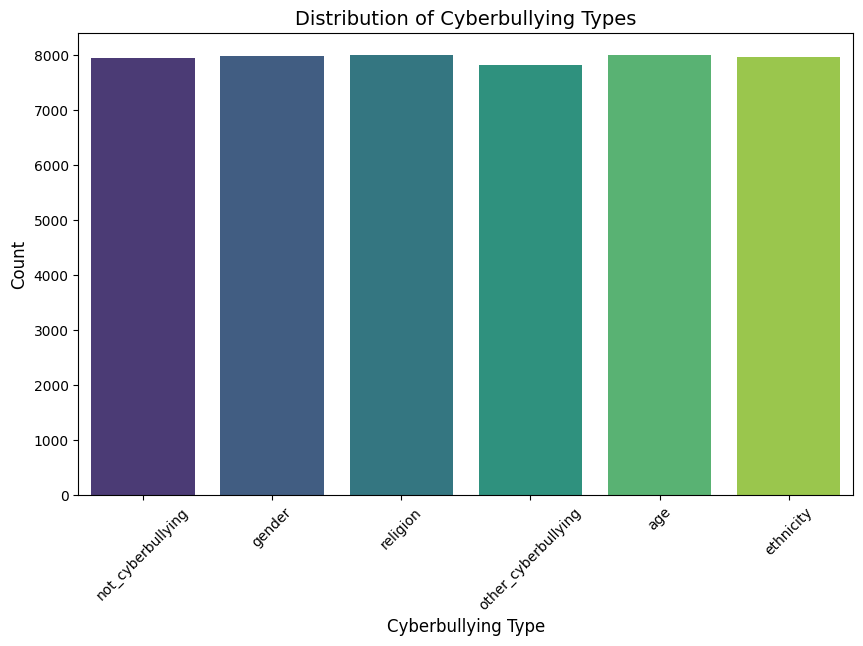

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of cyberbullying types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='cyberbullying_type', palette='viridis', hue='cyberbullying_type', dodge=False, legend=False)

# Customize plot
plt.title("Distribution of Cyberbullying Types", fontsize=14)
plt.xlabel("Cyberbullying Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


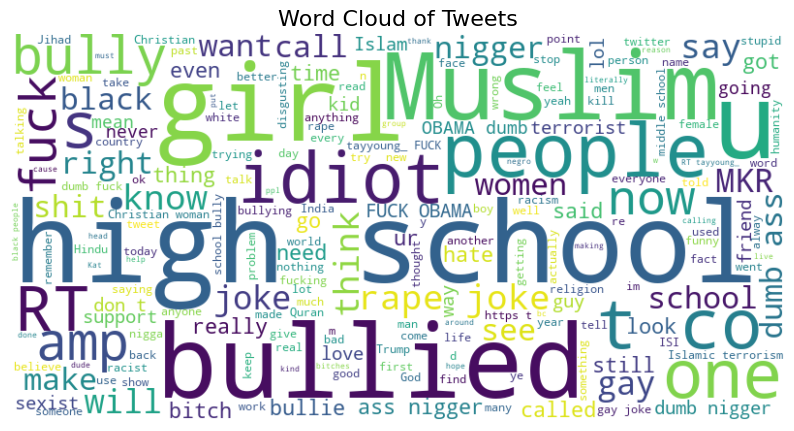

In [17]:
from wordcloud import WordCloud

# Combine all tweets into one string
all_text = " ".join(data['tweet_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets', fontsize=16)
plt.show()


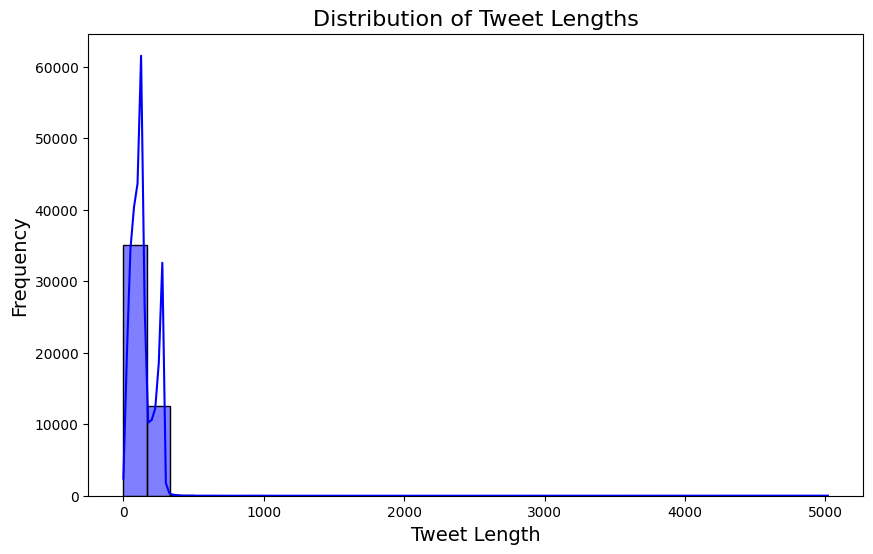

In [18]:
# Add a new column for tweet lengths
data['tweet_length'] = data['tweet_text'].apply(len)

# Plot the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['tweet_length'], kde=True, color='blue', bins=30)
plt.title('Distribution of Tweet Lengths', fontsize=16)
plt.xlabel('Tweet Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# Load your dataset
data = pd.read_csv(r"C:\Users\Vidhi\OneDrive\Desktop\cyber_bullying\cyberbullying_tweets.csv")  # Replace with your actual file path

# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['tweet_text'])  # 'tweet_text' column

# Step 2: Encode the Target Variable
# Ensure 'cyberbullying_type' is numeric; encode if it's categorical
y = data['cyberbullying_type']

# Step 3: Feature Selection using Chi-Square
k = 3000  # Select top 3000 features
chi2_selector = SelectKBest(chi2, k=k)
X_selected = chi2_selector.fit_transform(X, y)

# Print results
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {X_selected.shape[1]}")

# Optional: Save the selected features to reuse later
selected_features = vectorizer.get_feature_names_out()[chi2_selector.get_support()]
print(f"Top selected features: {selected_features[:10]}")  # Display first 10 selected features


Original number of features: 5000
Reduced number of features: 3000
Top selected features: ['000' '01' '05' '0xabad1dea' '0xjared' '100' '1000' '11' '128514' '13']


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
file_path = r"C:\Users\Vidhi\OneDrive\Desktop\cyber_bullying\cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Preprocess the data
X = data['tweet_text']  # Features: tweet text
y = data['cyberbullying_type']  # Target: cyberbullying type

# Convert text to numeric features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (38153, 5000)
Testing data shape: (9539, 5000)


Missing values in the dataset: 
tweet_text            0
cyberbullying_type    0
dtype: int64
Naive Bayes Accuracy: 0.7778593143935423
Classification Report:
                      precision    recall  f1-score   support

                age       0.80      0.96      0.87      1603
          ethnicity       0.88      0.90      0.89      1603
             gender       0.80      0.83      0.81      1531
  not_cyberbullying       0.66      0.45      0.54      1624
other_cyberbullying       0.63      0.58      0.61      1612
           religion       0.84      0.96      0.90      1566

           accuracy                           0.78      9539
          macro avg       0.77      0.78      0.77      9539
       weighted avg       0.77      0.78      0.77      9539

Confusion Matrix:
 [[1542    4    7   19   22    9]
 [  40 1435   20   11   52   45]
 [  16   38 1264  106   82   25]
 [ 162   66  130  728  395  143]
 [ 151   89  150  212  942   68]
 [  11    4   13   20    9 1509]]


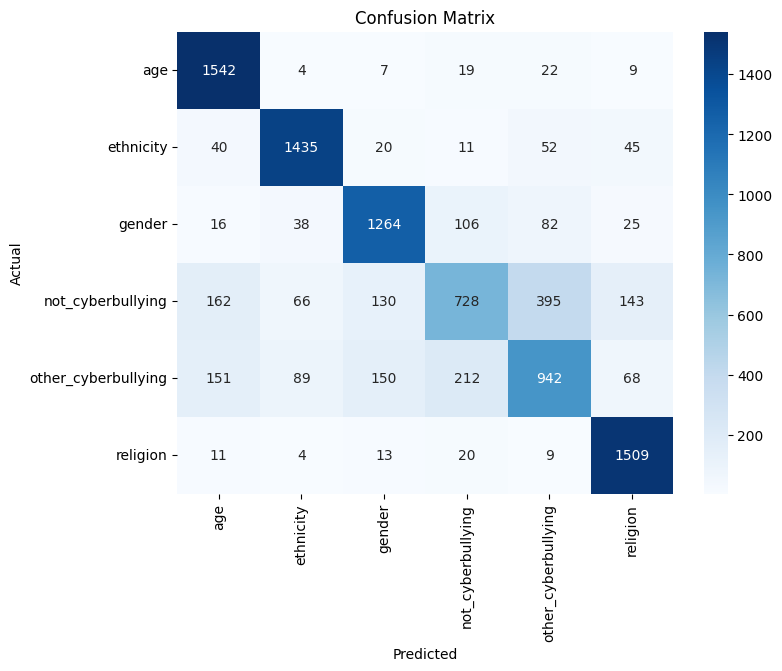

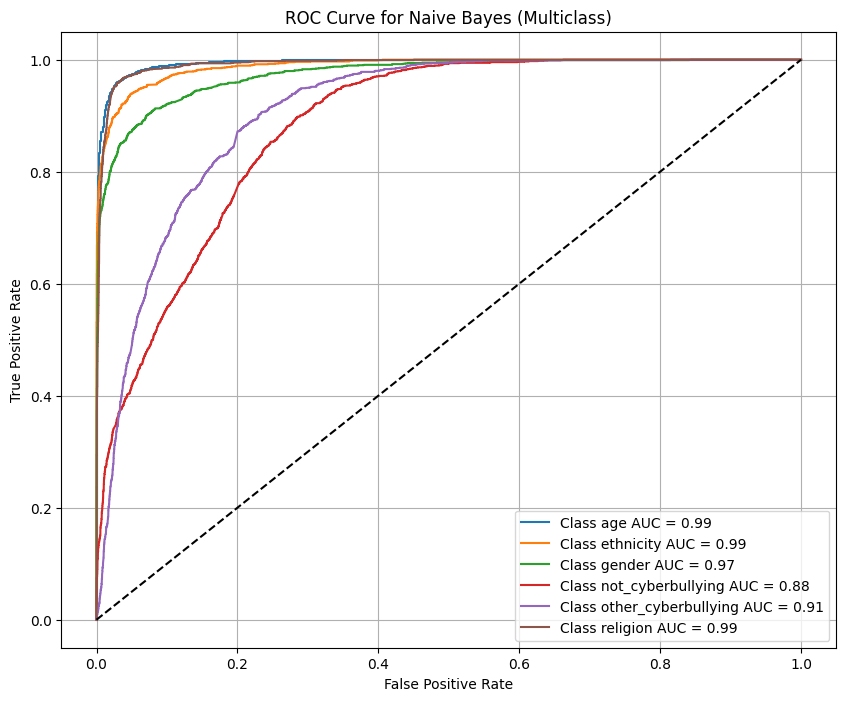

In [7]:
# Import necessary libraries naive bayes
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Load the dataset
file_path = r"C:\Users\Vidhi\OneDrive\Desktop\cyber_bullying\cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Check for missing values
print(f"Missing values in the dataset: \n{data.isnull().sum()}")

# Preprocess the data
X = data['tweet_text']  # Features: tweet text
y = data['cyberbullying_type']  # Target: cyberbullying type

# Convert text to numeric features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate and print results
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute ROC curve (one-versus-all for multiclass)
y_test_bin = label_binarize(y_test, classes=nb_model.classes_)  # Binarize the target
y_prob = nb_model.predict_proba(X_test)

plt.figure(figsize=(10, 8))
for i, class_label in enumerate(nb_model.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} AUC = {roc_auc:.2f}')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.title('ROC Curve for Naive Bayes (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Random Forest Accuracy: 0.8187441031554671
Classification Report:
                      precision    recall  f1-score   support

                age       0.98      0.98      0.98      1603
          ethnicity       0.98      0.98      0.98      1603
             gender       0.88      0.85      0.86      1531
  not_cyberbullying       0.58      0.51      0.54      1624
other_cyberbullying       0.56      0.65      0.60      1612
           religion       0.95      0.96      0.95      1566

           accuracy                           0.82      9539
          macro avg       0.82      0.82      0.82      9539
       weighted avg       0.82      0.82      0.82      9539

Confusion Matrix:
 [[1573    0    3   14   12    1]
 [   2 1566    5   10   16    4]
 [   0    4 1296   96  133    2]
 [  24    6   67  827  639   61]
 [   7   11   91  443 1051    9]
 [   0    4    9   30   26 1497]]


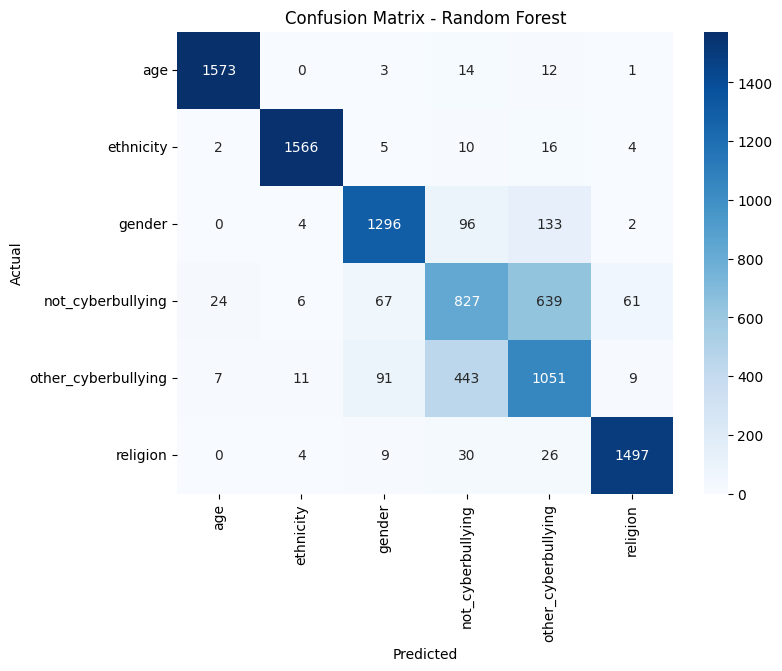

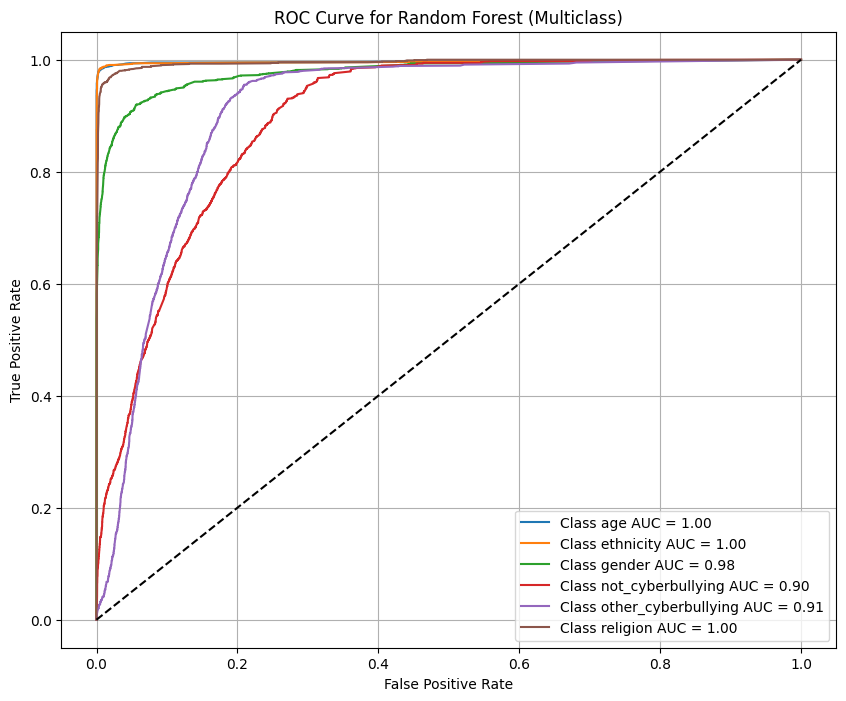

In [2]:
# Import the necessary  for random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Vidhi\OneDrive\Desktop\cyber_bullying\cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Preprocess the data
X = data['tweet_text']  # Features: tweet text
y = data['cyberbullying_type']  # Target: cyberbullying type

# Convert text to numeric features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate and print results
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute AUC and plot ROC curve (One-vs-All)
y_test_bin = label_binarize(y_test, classes=rf_model.classes_)  # Binarize the target
y_prob = rf_model.predict_proba(X_test)  # Get predicted probabilities

plt.figure(figsize=(10, 8))
for i, class_label in enumerate(rf_model.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} AUC = {roc_auc:.2f}')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.title('ROC Curve for Random Forest (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()




Logistic Regression Accuracy: 0.8311143725757417
Classification Report:
                      precision    recall  f1-score   support

                age       0.96      0.97      0.97      1603
          ethnicity       0.98      0.96      0.97      1603
             gender       0.90      0.82      0.86      1531
  not_cyberbullying       0.60      0.59      0.60      1624
other_cyberbullying       0.62      0.70      0.66      1612
           religion       0.95      0.95      0.95      1566

           accuracy                           0.83      9539
          macro avg       0.84      0.83      0.83      9539
       weighted avg       0.84      0.83      0.83      9539

Confusion Matrix:
 [[1560    1    4   23   13    2]
 [   2 1544    4   15   34    4]
 [   1    4 1262  144  116    4]
 [  47    7   55  957  505   53]
 [   6   12   66  389 1125   14]
 [   2    2    9   62   11 1480]]


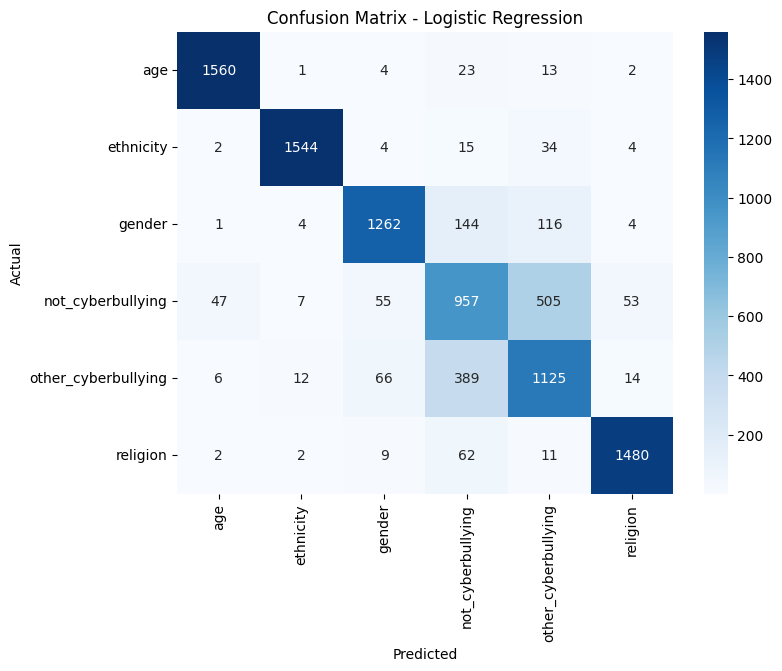

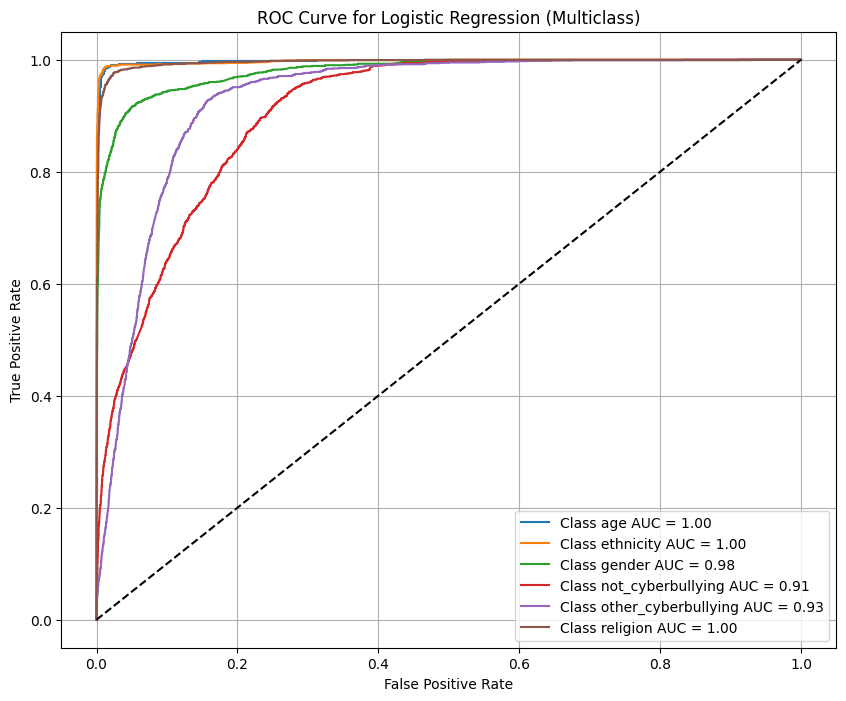

In [8]:
# Import necessary libraries logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate and print results
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Confusion Matrix Visualization
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute AUC and plot ROC curve (One-vs-All)
y_test_bin = label_binarize(y_test, classes=lr_model.classes_)  # Binarize the target
y_prob = lr_model.predict_proba(X_test)  # Get predicted probabilities

plt.figure(figsize=(10, 8))
for i, class_label in enumerate(lr_model.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} AUC = {roc_auc:.2f}')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.title('ROC Curve for Logistic Regression (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Vidhi\OneDrive\Desktop\cyber_bullying\cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Preprocess the data
X = data['tweet_text']  # Features: tweet text
y = data['cyberbullying_type']  # Target: cyberbullying type

# Convert text to numeric features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model with linear kernel
svm_model = SVC(kernel='linear', random_state=42, probability=True)  # Set probability=True for AUC calculation

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate and print results
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Confusion Matrix Visualization
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute AUC and plot ROC curve (One-vs-All)
y_test_bin = label_binarize(y_test, classes=svm_model.classes_)  # Binarize the target
y_prob = svm_model.predict_proba(X_test)  # Get predicted probabilities

plt.figure(figsize=(10, 8))
for i, class_label in enumerate(svm_model.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} AUC = {roc_auc:.2f}')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.title('ROC Curve for SVM (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()



Decision Tree Accuracy: 0.5812133072407045
Classification Report:
                      precision    recall  f1-score   support

                age       0.95      0.92      0.93      2349
          ethnicity       1.00      0.60      0.75      2418
             gender       0.95      0.51      0.67      2343
  not_cyberbullying       0.00      0.00      0.00      2466
other_cyberbullying       0.29      0.99      0.45      2391
           religion       0.99      0.49      0.66      2341

           accuracy                           0.58     14308
          macro avg       0.70      0.58      0.57     14308
       weighted avg       0.69      0.58      0.57     14308

Confusion Matrix:
 [[2157    1    2    1  188    0]
 [  14 1439    3    2  955    5]
 [   7    0 1196    0 1140    0]
 [  93    0    7    0 2354   12]
 [   5    0   13    0 2373    0]
 [   6    0   32    1 1151 1151]]


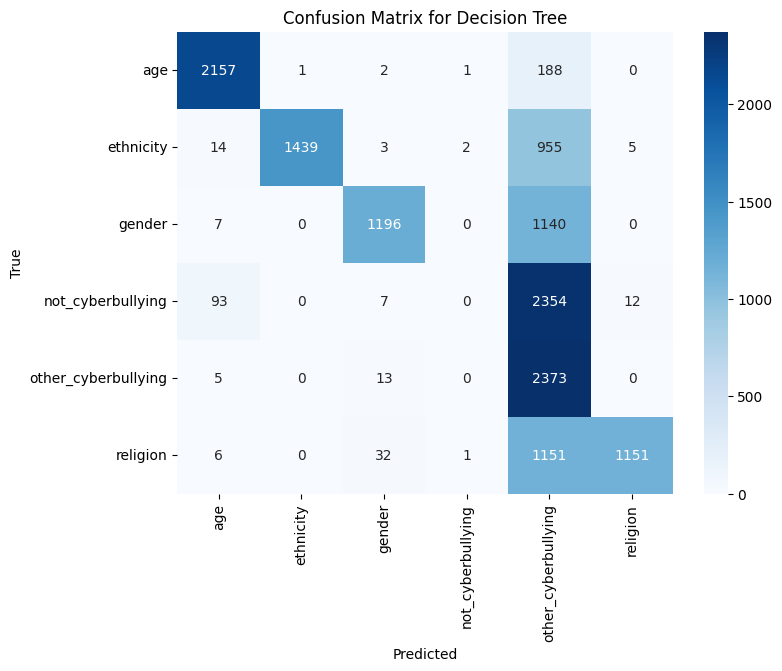

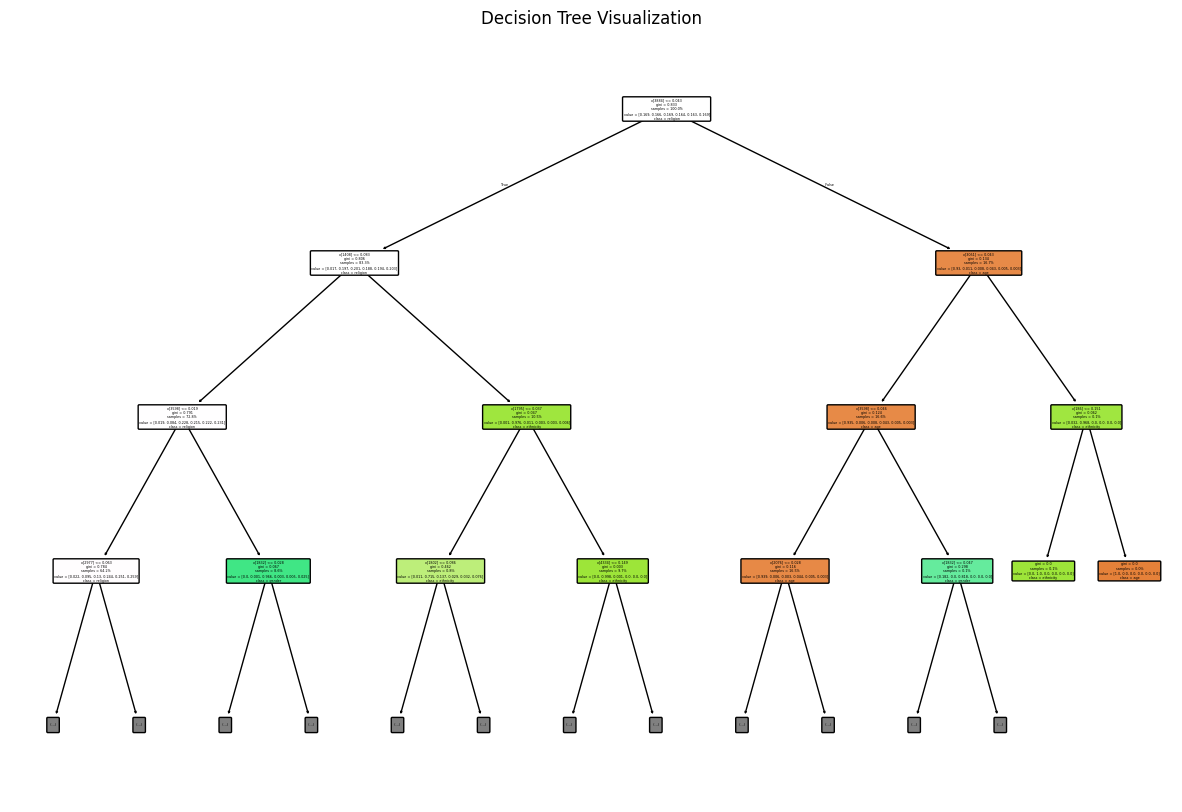

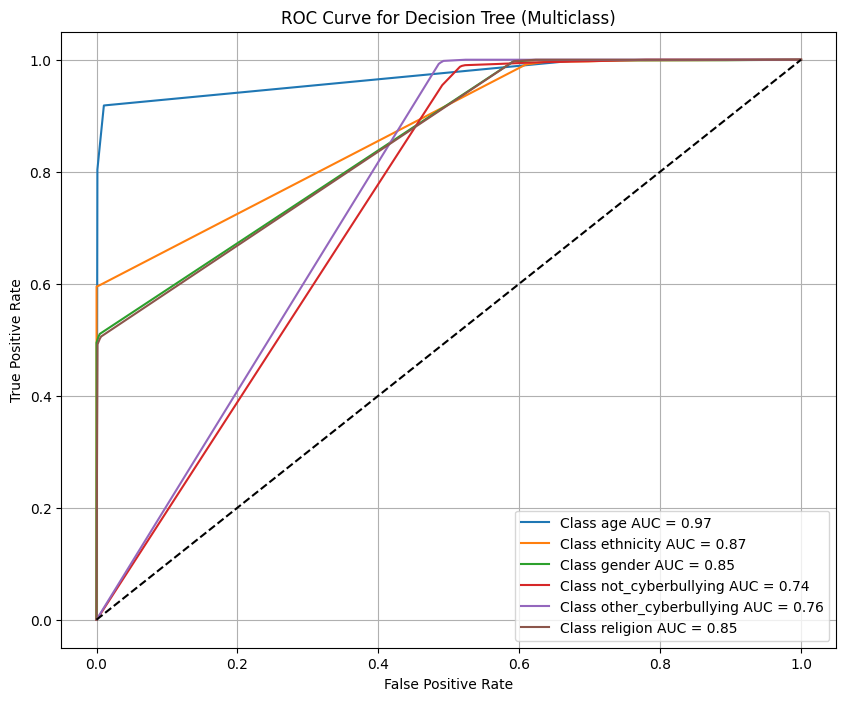

In [9]:
# Import necessary libraries decision tree
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Vidhi\OneDrive\Desktop\cyber_bullying\cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Preprocess the data
X = data['tweet_text']  # Features: tweet text
y = data['cyberbullying_type']  # Target: cyberbullying type

# Convert text to numeric features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model with a max depth of 5
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate and print results
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Plot Confusion Matrix using seaborn heatmap
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, class_names=dt_model.classes_, rounded=True, proportion=True, max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

# AUC and ROC Curve Computation
# Binarize the target labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=dt_model.classes_)  # Binarize the target
y_prob = dt_model.predict_proba(X_test)  # Get predicted probabilities

# Plot ROC Curve for each class
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(dt_model.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} AUC = {roc_auc:.2f}')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.title('ROC Curve for Decision Tree (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()



KNN Accuracy: 0.33687447581772434

Classification Report:
                      precision    recall  f1-score   support

                age       0.91      0.18      0.30      2349
          ethnicity       0.96      0.40      0.56      2418
             gender       0.64      0.29      0.40      2343
  not_cyberbullying       0.25      0.47      0.33      2466
other_cyberbullying       0.20      0.59      0.30      2391
           religion       0.89      0.08      0.14      2341

           accuracy                           0.34     14308
          macro avg       0.64      0.33      0.34     14308
       weighted avg       0.64      0.34      0.34     14308


Confusion Matrix:
 [[ 422    2   50  703 1172    0]
 [   3  956   58  510  891    0]
 [   5    9  686  615 1025    3]
 [  13   18  103 1160 1154   18]
 [  20   13   96  845 1416    1]
 [   0    1   77  763 1320  180]]


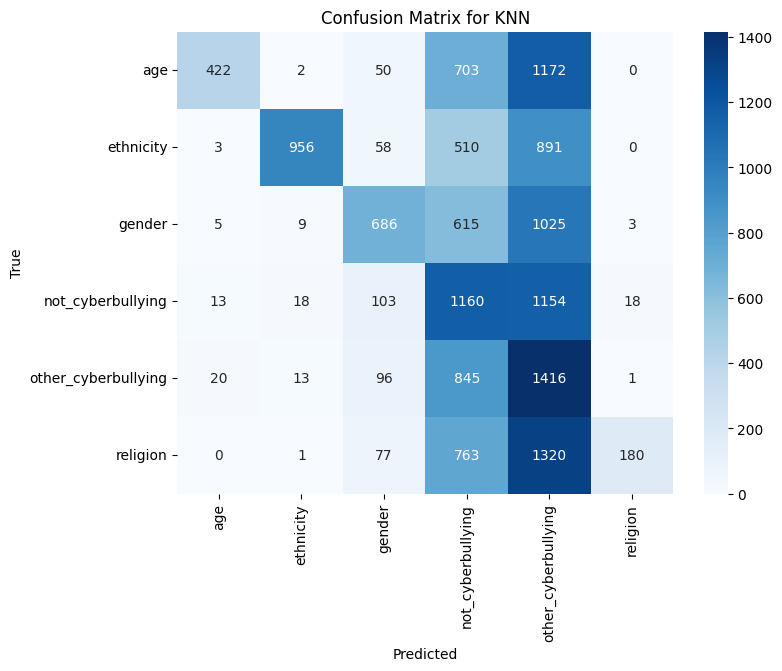

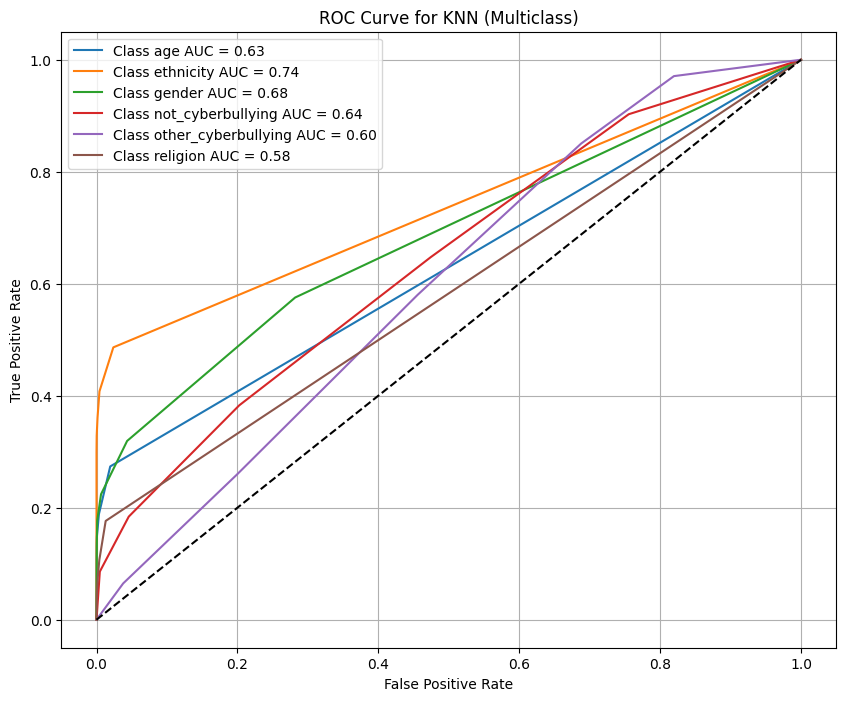

In [11]:
# Import necessary libraries knn
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune `n_neighbors` for better performance

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate and print results
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))  # Print accuracy
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))  # Print classification report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))  # Print confusion matrix

# Plot confusion matrix using seaborn heatmap
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title("Confusion Matrix for KNN")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# AUC and ROC Curve for KNN
# Binarize the labels for multiclass ROC computation
y_test_bin = label_binarize(y_test, classes=knn_model.classes_)
y_prob_knn = knn_model.predict_proba(X_test)  # Get probabilities

# Plot ROC Curve for each class
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(knn_model.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_knn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} AUC = {roc_auc:.2f}')

# Add plot details
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.title('ROC Curve for KNN (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [1]:
import pickle

# Save the trained SVM model and vectorizer using pickle
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer_file,model_file)

print("SVM model and vectorizer have been saved successfully!")


NameError: name 'svm_model' is not defined